<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Types-of-Violations" data-toc-modified-id="Types-of-Violations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Types of Violations</a></span></li><li><span><a href="#Place-Description-for-each-Violation-Type" data-toc-modified-id="Place-Description-for-each-Violation-Type-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Place Description for each Violation Type</a></span><ul class="toc-item"><li><span><a href="#Violation-vs-Chain/Non-Chain-Places" data-toc-modified-id="Violation-vs-Chain/Non-Chain-Places-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Violation vs Chain/Non-Chain Places</a></span></li></ul></li><li><span><a href="#Restaurant's-Age-and-Violation-Type" data-toc-modified-id="Restaurant's-Age-and-Violation-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Restaurant's Age and Violation Type</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Notes</a></span></li></ul></div>

After having cleaned the violation and business datasets, we now explore how the information and attributes of the restaurants is associated with the type of violation detected during inspection of the restaurants.

In particular, we look at the cuisine, the types of foods, and the characteristics of the place and check for any association with the type of violations detected. We also examine in which neighborhood or areas, violations occur more and how the number of each type of violation is evolving across time and seasons. We also check if the age, price range and the number of stars of the restaurant can be associated to the type of violations detected. Moreover, we examine the texts of reviews that were available before each inspection to check for any words or phrases that could indicate any possible violations. Our target is to collect all possible information about each restaurant that could indicate which restaurants are more likely to make a violation, so that health inspectors can prioritize their inspection efforts.

# Loading the data

We first import the required modules and load the clean data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")

# Types of Violations

We start our analysis by checking the types of violations reported and how they are evolving across time. During each inspection of a given restaurant, all detected violations are classified into low, medium or high violation, and multiple violations can be found during same inspection. Let us check which type of violation is more common and if there is any trend in their occurrences across time.

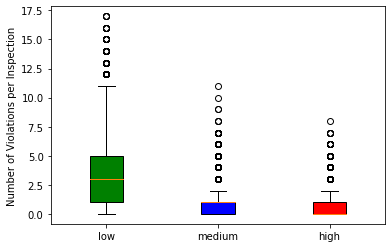

In [3]:
bplt = plt.boxplot(data[['low', 'medium', 'high']].T, vert=True, labels=[
                   'low', 'medium', 'high'], patch_artist=True)
colors = ['green', 'blue', 'red']
for patch, color in zip(bplt['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel("Number of Violations per Inspection")
plt.show()

We see that the number of violations of type low detected per inspection are higher and they occur more commonly than medium and high violations. 
Let us now check the evolution of the number of each violation type with time, to see if there is an increase or decrease in their occurrence.

We count the number of each type of violation for each month.

In [4]:
# Count the number of violations for each month
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'])
hist = data[['inspect_dt','low','medium','high']]
hist = hist.assign(inspect_my= hist['inspect_dt'].apply(
    lambda x: pd.to_datetime(str(datetime.date(x.year, x.month, 1)))))
trend = hist.groupby(["inspect_my"])[['low','medium','high']].mean()

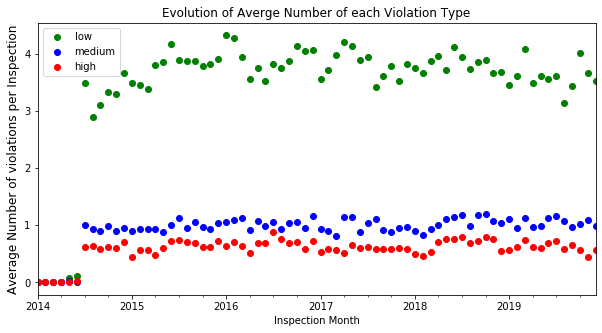

In [5]:
trend.plot(figsize=(10, 5), color=['green', 'blue','red'],marker='o',linestyle='')
plt.ylabel('Average Number of violations per Inspection', fontsize=12)
plt.xlabel('Inspection Month')
plt.title('Evolution of Averge Number of each Violation Type')
plt.show()

We see that on average the number of each type of violations is not decreasing with time, which implies the importance of doing regular inspections for the food facilities and restaurants.

# Place Description for each Violation Type

The column 'description' provides a brief description of the facility inspected. More specifically, it specifies whether the inspected place is a restaurant, supermarket or convenience store, and whether it belongs to a chain and if it provides liquor. We now check in which places each type of violation occur more.

First let us check the categories of places provided by the column 'description'

In [6]:
data.description.value_counts()

Restaurant without Liquor                            5624
Restaurant with Liquor                               5262
Chain Restaurant without Liquor                      3419
Chain Restaurant with Liquor                         1856
Chain Supermarket                                     421
Retail/Convenience Store                              390
Chain Packaged Food Only                              247
Chain Retail/Convenience Store                        215
Bakery                                                174
Food Processor                                        134
Supermarket                                           114
Packaged Food Only                                     73
Caterer                                                72
Chain Bakery                                           63
Rooming House with Guest food Service                  55
Hospital/Other Institution                             42
Mobile - Tier II ( Prepared Foods)                     40
Mobile  Tier 

We next focus on places that were at least 10 times inspected.

In [7]:
places_to_focus = (data.description.value_counts()).reset_index()
places_to_focus = list(
    places_to_focus[places_to_focus.description >= 10]['index'])
subset_data = data[(data.description.isin(places_to_focus))]

For each place, we compute the average and maximum number of each violation type detected per inspection.

In [8]:
desc_mean = subset_data.groupby(["description"])[
    ['low', 'medium', 'high']].mean().reset_index()
desc_max = subset_data.groupby(["description"])[
    ['low', 'medium', 'high']].max().reset_index()
description = desc_mean.merge(
    desc_max, on='description', suffixes=['_mean', '_max'])

We now visualize the obtained averages and maximum values for each place. We first shorten some of the names of places (of column 'description'), because we will use them to annotate the points on the plots.

In [9]:
description['description'] = description.description.apply(
    lambda s: s.replace('Restaurant', "Rest."))
description['description'] = description.description.apply(
    lambda s: s.replace('Retail/Convenience', 'Retail'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Nursing Home/Personal Care Comb.', 'Nursing Home'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Rooming House with Guest food Service', 'Rooming House'))
description['description'] = description.description.apply(lambda s: s.replace(
    'Kitchen', 'Kit.'))

To make the visualization clearer to read, we provide a separate plot for each violation type. In each plot, we plot the average number of violations vs the maximum number of violations for each type of place.

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


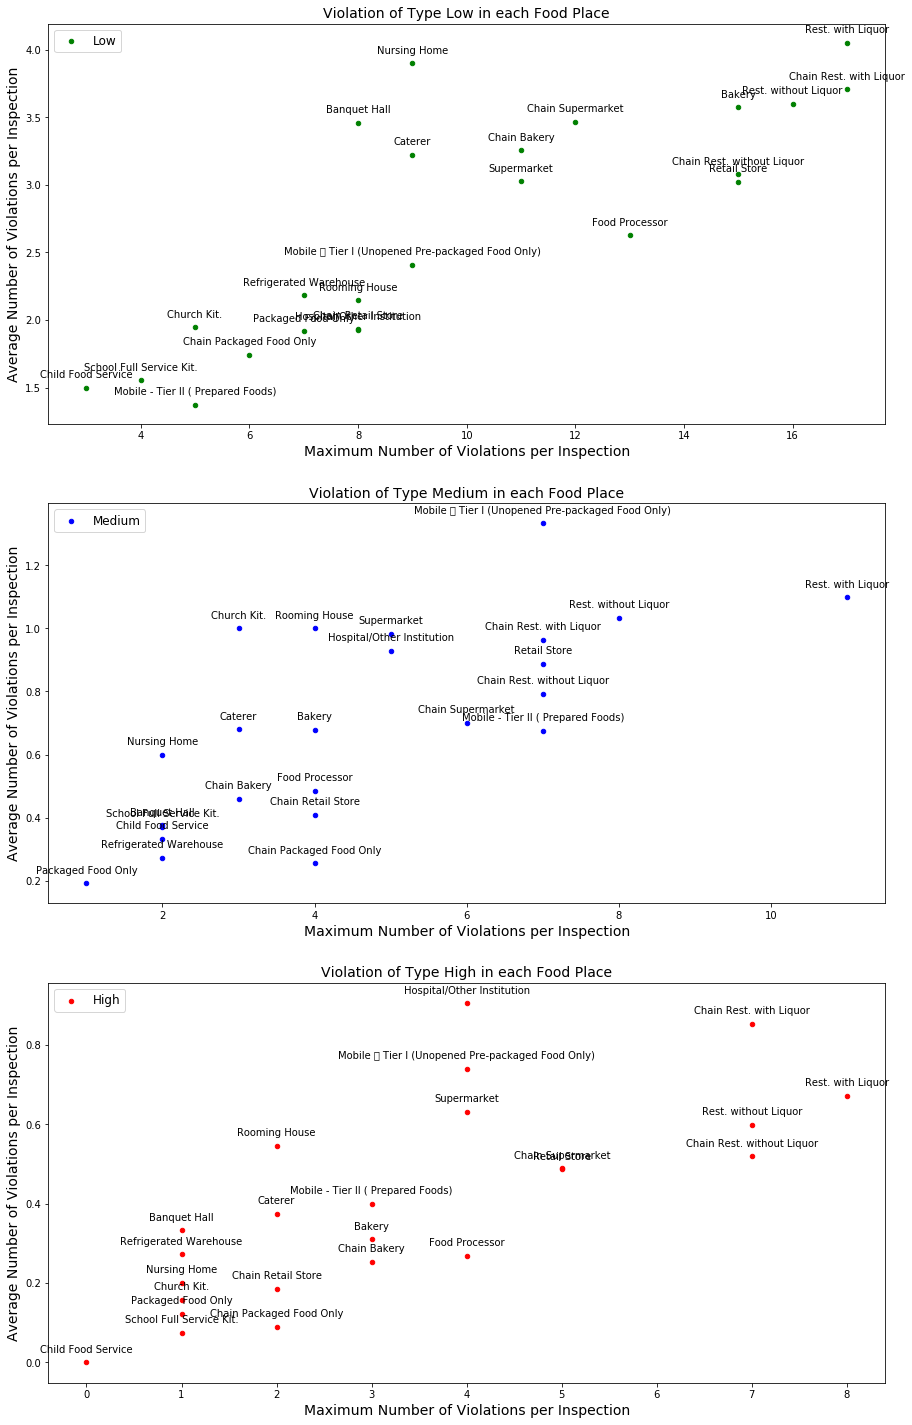

In [10]:
figure, axes = plt.subplots(3, 1, figsize=(15, 25))

description.plot.scatter('low_max', 'low_mean', c='g', label='Low', ax=axes[0])
for x, y, place in zip(description.low_max, description.low_mean,
                       description.description):
    axes[0].annotate(place,  
                     (x, y),  
                     textcoords="offset points", 
                     xytext=(0, 10),  
                     ha='center')
axes[0].set_title('Violation of Type Low in each Food Place', fontsize=14)

description.plot.scatter('medium_max', 'medium_mean',
                         c='b', label='Medium', ax=axes[1])
for x, y, place in zip(description.medium_max, description.medium_mean,
                       description.description):
    axes[1].annotate(place,  
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[1].set_title('Violation of Type Medium in each Food Place', fontsize=14)

description.plot.scatter('high_max', 'high_mean',
                         c='r', label='High', ax=axes[2])
for x, y, place in zip(description.high_max, description.high_mean,
                       description.description):
    axes[2].annotate(place, 
                     (x, y),  
                     textcoords="offset points",  
                     xytext=(0, 10),  
                     ha='center')
axes[2].set_title('Violation of Type High in each Food Place', fontsize=14)

for axe in axes:
    axe.set_ylabel('Average Number of Violations per Inspection', fontsize=14)
    axe.set_xlabel('Maximum Number of Violations per Inspection', fontsize=14)
    axe.legend(loc='upper left', fontsize=12)

plt.show()

In the above plots, the less clean food facilities appear in the upper right corner of the plot and the cleaner facilities appear in the lower left corner of the plot. We notice that for all violation types, violations are mainly detected in restaurants. For mobile restaurants, medium and high violations are more prominent. On the other hand, cleaner places are those that provide child food or inside a school or church.  

## Violation vs Chain/Non-Chain Places

We now zoom into the chain and non chain places, to check if this characteristic can be associated with the type of violation.

We first extract the places that belong to a chain and those that do not belong. We then add an indicator column that specifies this characteristic. 

In [11]:
non_chain = ['Bakery', 'Packaged Food Only', 'Restaurant with Liquor',
             'Restaurant without Liquor',
             'Retail/Convenience Store', 'Supermarket']
chain = ['Chain Bakery', 'Chain Packaged Food Only', 'Chain Restaurant with Liquor',
         'Chain Restaurant without Liquor', 'Chain Retail/Convenience Store',
         'Chain Supermarket']
pl_chain = data[['description', 'low', 'medium', 'high']]
chains = pl_chain['description'].apply(lambda s: 1 if s in chain else 0)
pl_chain = pl_chain.assign(chain=chains)
pl_chain = pl_chain[((pl_chain.description.isin(chain)) |
                     (pl_chain.description.isin(non_chain)))]

We then plot the violin plots for each type of violation and then compare them between the chain and non-chain places.

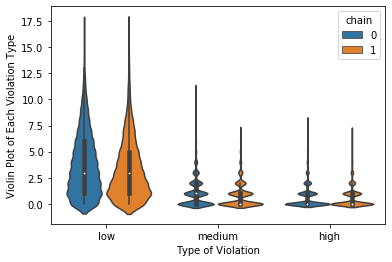

In [12]:
pl_chain = pl_chain.melt(['description', 'chain'],
                         var_name='violation', value_name='number')
sns.violinplot(data= pl_chain, x='violation',y='number',hue='chain')
plt.xlabel('Type of Violation')
plt.ylabel('Violin Plot of Each Violation Type')
plt.show()

We do not see a difference in the distribution of number of violations detected between chain and non-chain places.

# Restaurant's Age and Violation Type 

For each restaurant, the business starting date is given in the column "bus_st_date". From this column, we can find the age of the restaurant on the inspection day. Let us check if the fact if the restaurant is new or old can help in predicting the violation type.

We first compute the age (in years) at the inspection by subtracting the entries of column "bus_st_date" from the column "inspect_dt" (inspection date).

In [13]:
data_age = data[['inspect_dt','bus_st_date','low','medium','high']]
data_age = data_age[data_age.bus_st_date != 'none']
data_age['age'] = (pd.to_datetime(data_age['inspect_dt']) -
              pd.to_datetime(data_age['bus_st_date'])).apply(lambda x: x.days/365)

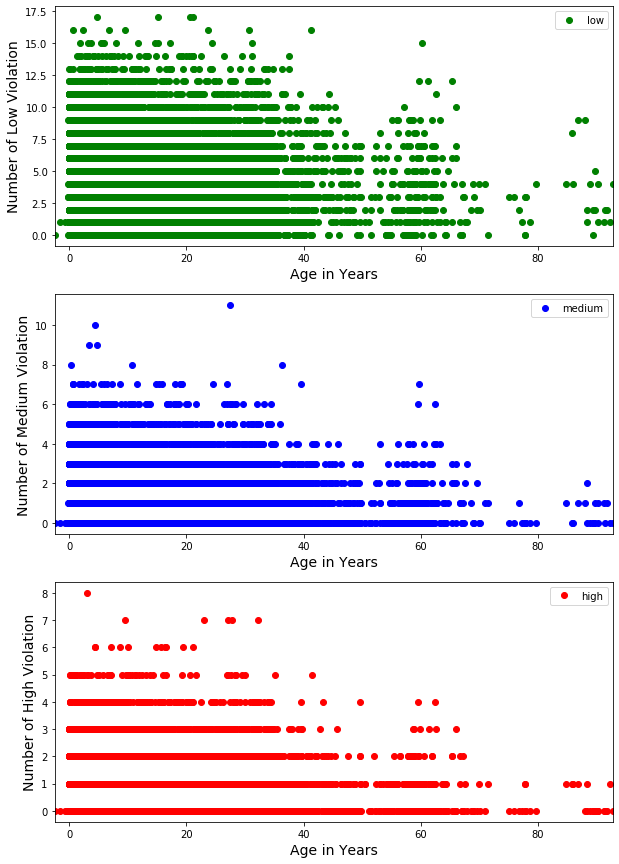

In [14]:
figure, axes = plt.subplots(3, 1, figsize=(10, 15))

data_age.plot('age', 'low',marker='o',linestyle='',ax=axes[0],color='g')
axes[0].set_xlabel('Age in Years', fontsize=14)
axes[0].set_ylabel('Number of Low Violation',fontsize=14)

data_age.plot('age', 'medium',marker='o',linestyle='',ax=axes[1],color='b')
axes[1].set_xlabel('Age in Years', fontsize=14)
axes[1].set_ylabel('Number of Medium Violation',fontsize=14)

data_age.plot('age', 'high',marker='o',linestyle='',ax=axes[2],color='r')
axes[2].set_xlabel('Age in Years', fontsize=14)
axes[2].set_ylabel('Number of High Violation',fontsize=14)
plt.show()
plt.show()

We mainly notice that with old restaurants (above 70 years), low number of medium and high violations is detected. This might be because old restaurants are more experienced and aware of the regulations, or they follow more rigorously the regulations to maintain their reputation.

# Notes
- compared the number of each violation type with the number of stars, the number of reviews and the price range for each restaurant: no much differences
- plotted the choropleth maps of each violation type by zipcodes of Allegheny county: noticed some differences in their map distribution
- examined the attributes of restaurants given by yelp reviews for each violation type: noticed some differences especially with attribute: specialty food and types of place.
- examined the reviews texts, used unsupervised sentiment analysis and topic modelling, still need to pair the results with each type of violation
- still need to do some statistical inference